In [1]:
import math
import ctREFPROP.ctREFPROP as ct
import os
import numpy as np
import matplotlib.pyplot as plt


# Hack for my installation
os.environ['RPPREFIX'] = r'C:\\Program Files (x86)\REFPROP'

root = os.environ['RPPREFIX']
#r = ct.REFPROPFunctionLibrary(os.path.join(root, 'refprop.dll'))
r = ct.REFPROPFunctionLibrary(os.path.join(root, 'REFPRP64.dll'))
r.SETPATHdll(root)



## Plotting details

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
fontsz = BIGGER_SIZE

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


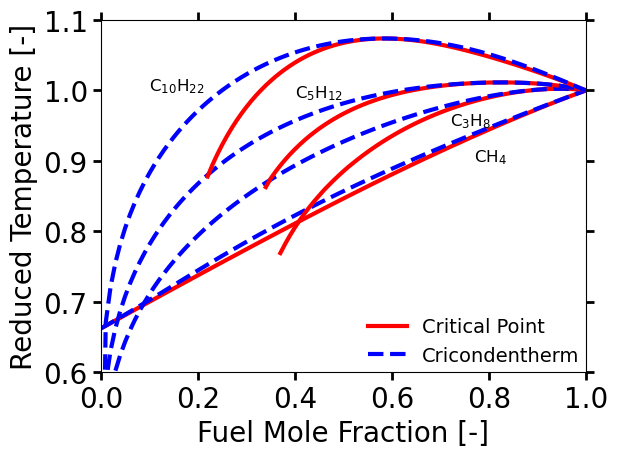

In [2]:
fig, ax1 = plt.subplots()

Case = np.arange(1,5+1,1)
qq=-1
while qq<4:
    qq+=1
    if Case[qq]==1:
        fuel_type='methane.FLD'
    if Case[qq]==2:
        fuel_type='propane.FLD'
    if Case[qq]==3:
        fuel_type='pentane.FLD'
    if Case[qq]==4:
        fuel_type='heptane.FLD'
    if Case[qq]==5:
        fuel_type='decane.FLD'

    amb_type='nitrogen.FLD'
    mix_list=fuel_type+"|"+amb_type
    ierr, herr = r.GERG08dll(2,0)
    if ierr !=0:
        raise ValueError(str(ierr) + ':' + herr)

    r.FLAGSdll('GERG',1)
    ierr, herr = r.SETUPdll(2,mix_list,'HMX.BNC','DEF')
    if ierr !=0:
        raise ValueError(str(ierr) + ':' + herr)

    #r.FLAGSdll('AGA8',0)


    iUnits = 0 # in kPa
    iMass = 0
    iFlag = 1
    T = 0
    D = 0


    dX = 0.01
    xf = np.arange(0,1+dX,dX)
    CriT = np.zeros(xf.size)
    CP_T = np.zeros(xf.size)
    CP_T_2 = np.zeros(xf.size)
    i=-1


    ## MAXPdll good subroutine for finding max pressure along the saturation line


    for x in xf:
        i+=1
        z=[x,(1-x)]
        CriticalProp = r.CRTPNTdll(z,0,0)
        r.FLAGSdll('Splines off',1)
        if CriticalProp.ierr == 0:
            CP_T[i] = CriticalProp.Tc
      
        else: 
            CP_T[i] = None
            
        if Case[qq]==4:
            ALL = r.ALLPROPSdll('TCEST',iUnits,iMass,iFlag,T,D,z)
            SubALL = ALL[0]
            Crit = SubALL[0]
            CP_T_2[i] = Crit
            if x<0.35:
                CP_T_2[i] = None
    i=-1
    for x in xf:
        i+=1
        z=[x,(1-x)]
        ierr, herr = r.SATSPLNdll(z)  # turns splines on
        ALL = r.ALLPROPSdll('TMAXT',iUnits,iMass,iFlag,T,D,z)
        SubALL = ALL[0]
        Cri = SubALL[0]
        CriT[i] = Cri
        
    
    if Case[qq]!=4:
        ax1.plot(xf, CP_T/CP_T[-1],'r',linewidth=3)
        ax1.plot(xf, CriT/CP_T[-1], 'b--',linewidth=3)
    
        
fig.legend(['Critical Point','Cricondentherm'],bbox_to_anchor=(0.95, -0.15, 0, 0.5),fontsize=14,frameon=False)
ax1.set_ylabel('Reduced Temperature [-]',fontsize=fontsz)  # we already handled the x-label with ax1
ax1.set_xlabel('Fuel Mole Fraction [-]',fontsize=fontsz)
ax1.tick_params(axis='x', labelsize=fontsz)
ax1.tick_params(axis='y')
ax1.tick_params(axis='y', labelsize=fontsz)
plt.ylim([0.6,1.1])
plt.xlim([0,1])

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
font = {'family' : 'normal',
        'weight' : 'normal'}
ax1.tick_params(direction='out', length=6, width=2, colors='k',
               grid_color='r', grid_alpha=0.5,right='bool',top='bool')
plt.rc('font', **font)
plt.text(0.77,0.9,'CH$_4$',fontsize=12, color='k')
plt.text(0.72,0.95,'C$_3$H$_8$',fontsize=12, color='k')
plt.text(0.4,0.99,'C$_5$H$_{12}$',fontsize=12, color='k')
plt.text(0.1,1,'C$_{10}$H$_{22}$',fontsize=12, color='k')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

    
        